$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Unsupervised Learning

In this note, we discuss the two subtopics of unsupervised learing, clustering and dimensionality reduction.


# Clustering


When there is no information available for classification target, often we still want to find different groups of data. We call these as *clusters*, and we call this approach as *clustering*. Let us talk about two clustering techniques, k-means and Gaussian mixture models. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## K-means

First and easy clustering approach is K-means algorithm, which is non-probabilistic. 
Without knowing about actual groups, we want to find K partitions of N observations in D dimensions. 
That is, the observation data $\Xm = {\xv_1, \cdots, \xv_N}$ and $\xv_i \in \R^D$.
When we devide data into K clusters, an intuitive way is to find groups whose inter-point distances inside a cluster are smaller than the out-side-cluter-point distances.  

We can formulate this by selecting a center of each cluster, named $\muv_k$:

$$
E = \sum_{i=1}^{N} \sum_{k=1}^{K} \delta_{ik} \Vert \xv_i - \muv_k \Vert^2.
$$

where $\delta_{ik} \in {0, 1}$ is a binary indicator variable that has 1 if $\xv_i$ is assigned to cluster $k$, otherwise 0. 

Thus, our goal is finding the $\delta_ik$ and $\muv_k$ that minimizes the $E$. 

For this goal, 

1. we first choose an initial $\muv_k$ randomly,

2. minimize $E$ w.r.t. the $\delta_{ik}$.

3. Now, fixing the $\delta_{ik}$, update $\muv_k$ that minimizes $E$. 

4. Repeating 2 and 3, we obtain the $K$ clusters after convergence. 

In [ ]:
# K-means: Sketch. 

def kmeans(X, K=2, maxiter=100):
    N = X.shape[0]
    # select initial centers
    cidx = np.random.choice(N, K, replace=False)
    centers = X[cidx, :]
    
    # repeat until convergence or up to maxiter
    for step in range(maxiter):
        #### TODO: finish this for-loop for k-means!
        # Assignment: find clusters that minimizes E with current centers
        
        # compute E and check convergence
        
        # Update: update cluster centers
            
    return centers, classes, E

## Hint and Sample Data Practice

Here follows some hints to fill in the blanks. 

In [78]:
X = np.random.rand(100,2)
X

array([[ 0.4120504 ,  0.7622425 ],
       [ 0.66172304,  0.5993946 ],
       [ 0.25504412,  0.82260979],
       [ 0.73003061,  0.5778881 ],
       [ 0.45717559,  0.04224642],
       [ 0.49075625,  0.44902948],
       [ 0.79252412,  0.85248571],
       [ 0.03358044,  0.5859509 ],
       [ 0.59528221,  0.35564181],
       [ 0.47181689,  0.16732951],
       [ 0.90389896,  0.34953526],
       [ 0.18468496,  0.35088683],
       [ 0.2822487 ,  0.99486233],
       [ 0.54277088,  0.72042437],
       [ 0.24030675,  0.9928583 ],
       [ 0.79234859,  0.15802937],
       [ 0.00398484,  0.98412476],
       [ 0.06965128,  0.61193018],
       [ 0.9691747 ,  0.71385575],
       [ 0.4065893 ,  0.05092599],
       [ 0.08836231,  0.37991577],
       [ 0.75048565,  0.63356263],
       [ 0.73103925,  0.98576428],
       [ 0.04677786,  0.74923863],
       [ 0.3058493 ,  0.27820615],
       [ 0.18579871,  0.2300053 ],
       [ 0.02064056,  0.15175578],
       [ 0.34972281,  0.82135118],
       [ 0.81679357,

In [79]:
c = X[[1,4], :]
c

array([[ 0.66172304,  0.5993946 ],
       [ 0.45717559,  0.04224642]])

In [80]:
C = c[:, np.newaxis, :]
C

array([[[ 0.66172304,  0.5993946 ]],

       [[ 0.45717559,  0.04224642]]])

In [81]:
X - C

array([[[-0.24967263,  0.1628479 ],
        [ 0.        ,  0.        ],
        [-0.40667891,  0.22321519],
        [ 0.06830757, -0.02150651],
        [-0.20454744, -0.55714818],
        [-0.17096679, -0.15036513],
        [ 0.13080109,  0.25309111],
        [-0.6281426 , -0.0134437 ],
        [-0.06644083, -0.24375279],
        [-0.18990614, -0.43206509],
        [ 0.24217592, -0.24985935],
        [-0.47703808, -0.24850778],
        [-0.37947434,  0.39546773],
        [-0.11895215,  0.12102977],
        [-0.42141629,  0.39346369],
        [ 0.13062555, -0.44136524],
        [-0.65773819,  0.38473015],
        [-0.59207175,  0.01253558],
        [ 0.30745166,  0.11446115],
        [-0.25513374, -0.54846862],
        [-0.57336073, -0.21947883],
        [ 0.08876262,  0.03416802],
        [ 0.06931622,  0.38636967],
        [-0.61494518,  0.14984402],
        [-0.35587374, -0.32118846],
        [-0.47592432, -0.3693893 ],
        [-0.64108247, -0.44763883],
        [-0.31200022,  0.221

In [82]:
(X - C)**2

array([[[  6.23364244e-02,   2.65194375e-02],
        [  0.00000000e+00,   0.00000000e+00],
        [  1.65387739e-01,   4.98250200e-02],
        [  4.66592418e-03,   4.62529874e-04],
        [  4.18396567e-02,   3.10414096e-01],
        [  2.92296420e-02,   2.26096710e-02],
        [  1.71089239e-02,   6.40551084e-02],
        [  3.94563125e-01,   1.80733170e-04],
        [  4.41438403e-03,   5.94154240e-02],
        [  3.60643425e-02,   1.86680243e-01],
        [  5.86491763e-02,   6.24296923e-02],
        [  2.27565330e-01,   6.17561148e-02],
        [  1.44000771e-01,   1.56394725e-01],
        [  1.41496147e-02,   1.46482051e-02],
        [  1.77591690e-01,   1.54813677e-01],
        [  1.70630340e-02,   1.94803273e-01],
        [  4.32619529e-01,   1.48017289e-01],
        [  3.50548960e-01,   1.57140656e-04],
        [  9.45265258e-02,   1.31013541e-02],
        [  6.50932253e-02,   3.00817825e-01],
        [  3.28742524e-01,   4.81709588e-02],
        [  7.87880188e-03,   1.167

In [83]:
np.sum((X - C)**2, axis=2)

array([[  8.88558620e-02,   0.00000000e+00,   2.15212759e-01,
          5.12845405e-03,   3.52253753e-01,   5.18393130e-02,
          8.11640323e-02,   3.94743859e-01,   6.38298080e-02,
          2.22744586e-01,   1.21078869e-01,   2.89321445e-01,
          3.00395496e-01,   2.87978197e-02,   3.32405368e-01,
          2.11866307e-01,   5.80636818e-01,   3.50706101e-01,
          1.07627880e-01,   3.65911050e-01,   3.76913483e-01,
          9.04625580e-03,   1.54086264e-01,   4.00610803e-01,
          2.29808142e-01,   3.62952421e-01,   6.11367254e-01,
          1.46608859e-01,   1.14225787e-01,   5.54179535e-02,
          6.18193917e-02,   1.59419518e-01,   1.69277825e-01,
          1.78853598e-01,   3.57803762e-02,   1.07065852e-02,
          4.88577243e-02,   5.99014595e-03,   3.94812089e-01,
          4.48998921e-01,   5.07304104e-01,   1.86429449e-01,
          1.95273891e-01,   7.09478542e-02,   3.96793746e-02,
          1.73065198e-01,   1.37296436e-01,   7.64643476e-01,
        

In [84]:
np.argmin(np.sum((X - C)**2, axis=2), axis=0)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0])

In [86]:
kmeans(X)

(array([[ 0.50583678,  0.73554919],
        [ 0.41644222,  0.24617458]]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0]),
 [12.741553386243041,
  10.134741472209198,
  9.7326414301871029,
  9.6463238779675979,
  9.6332838592582331])

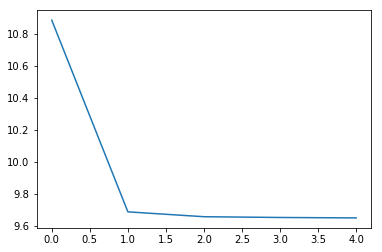

In [87]:
mus, classes, errs = kmeans(X)

plt.plot(errs)

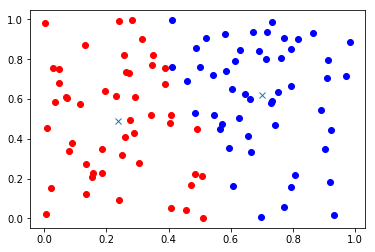

In [88]:
plt.plot(X[classes==0, 0], X[classes==0, 1], 'or')
plt.plot(X[classes==1, 0], X[classes==1, 1], 'ob')
plt.plot(mus[:, 0], mus[:, 1], 'x')

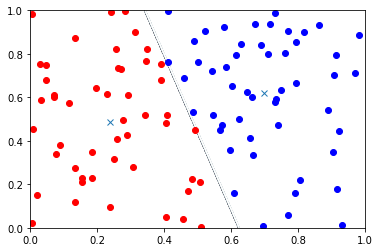

In [90]:
xs, ys = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))

Xb = np.vstack((xs.flat, ys.flat)).T

# find classes from the mus
edists = np.sum((Xb - mus[:,np.newaxis,:])**2, axis=2)
cs = np.argmin(edists, axis=0)

# plot the boundary
plt.clf()
plt.contour(xs, ys, cs.reshape(xs.shape), cmap=plt.cm.bone)
plt.plot(X[classes==0, 0], X[classes==0, 1], 'or')
plt.plot(X[classes==1, 0], X[classes==1, 1], 'ob')
plt.plot(mus[:, 0], mus[:, 1], 'x')


<hr/>
<hr/>
# Dimensionality Reduction

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is one of the dimensionality reduction tools. 
PCA is also used for feature extraction, data compression, and data visualization. 
It is also known as Karhunen-Loeve (KL) transform.

PCA reduces the dimension of the data by finding the data samples that vary the most. 
For this reason, we first look at the variance of the data. 

$$
var(\zv) = \frac{1}{N} \sum_{n=1}^{N} \zv_n^2 
$$

From the variance, PCA finds the orthogonal projection of the data onto the *principal subspace*, which is a lower dimensional linear space. 
Now, let us look for a direction $\vv$ that maximazes the variances.
Here, $\vv$ is a unit vector, so the dot product represents a projection onto it. 
The projection of data $\xv_n$ onto $\vv$ is 

$$
\zv = \xv_n^\top \vv.
$$

The variance of this projected data $\zv$ is 

$$
\begin{align*}
var(\zv) &= \frac{1}{N} \sum_{n=1}^{N} \vv^\top \xv_n \xv_n^\top \vv \\
         &= \vv^\top \Big( \frac{1}{N} \sum_{n=1}^{N} \xv_n \xv_n^\top \Big) \vv \\
         &= \vv^\top \Sigmav \vv
\end{align*}
$$

where $\Sigmav$ is a covariance matrix of $\xv_n$.

## Optimization Problem

$$
\begin{equation*}
\begin{aligned}
& \underset{\vv}{\text{maximize}}
& & \vv^\top \Sigmav \vv \\
& \text{subject to}
& & \vv^\top \vv = 1.
\end{aligned}
\end{equation*}$$

Using a Lagrange multiplier that is denoted by $\lambda$, we can make an unconstrained maximization of

$$
q(\vv) = \vv^\top \Sigmav \vv + \lambda ( 1 - \vv^\top \vv). 
$$

As usual, setting the derivative w.r.t. $\vv$, we can get

$$
0 = 2 \Sigmav \vv - 2 \lambda \vv, 
$$

$$
\lambda \vv = \Sigmav \vv.
$$

We can see that the direction vector $\vv$ is an eigenvector!

Also, since $\vv$ is a unit vector, we can apply $\vv^\top \vv = 1$ by left-multiplying $\vv^\top$,

$$
\lambda = \vv^\top \Sigmav \vv.
$$

So, we can obtain the maximum variance when $\vv$ is the eigenvector having the largest eigenvalue $\lambda$. 
This eigenvector is called as the *first principal component*. 

Other principal components, or other directions that are orthogonal to the first principal component, are found by the eigendecomposition of $\Sigmav$, or the singular value decomposition of data sample matrix $\Xm$ <u>**with zero means**</u>. 

$$
\Xm = \Um \Lambdav^{\frac{1}{2}} \Vm^\top,
$$

where the $\Lambdav$ is a diagonal matrix with eigenvalue elements. 


For implementation, we need to keep track of shapes of each matrix. 

- $\Xm$: N x D

- $\Um$: N x D

- $\Lambdav$: D x D

- $\Vm$: D x D


In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
# PCA 

def pca(X):
    """ principal component analysis
    
        parameter
        ---------
        X        ndarray (N x D)
                 input data
                 
        return
        ------
        @U       ndarray (N x D)
                 left singular vectors
        @S       ndarray (D x D)
                 diagonal matrix with square root of eigenvalues
        @V       ndarray (D x D)
                 right singular vectors
        @mu      ndarray (D,)
                 1d vector of column means 
    """
    
    ### TODO: implement PCA using np.linalg.svd

    
    return U, S, V.T, means

(-8, 8)

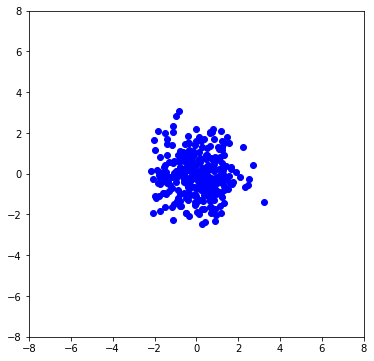

In [198]:
mu1 = np.array([0, 0])
S1 = np.eye(2)

X1 = np.random.multivariate_normal(mu1, S1, 300)

plt.figure(figsize=(6,6))
plt.plot(X1[:, 0], X1[:, 1], 'ob')
plt.xlim([-8, 8])
plt.ylim([-8, 8])

(-8, 8)

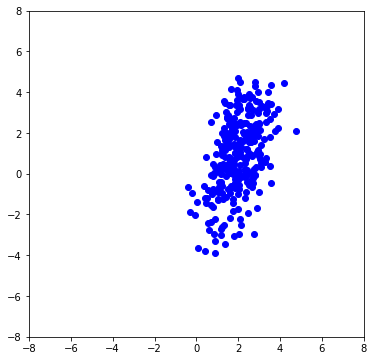

In [197]:
mu2 = np.array([2, 1])
S2 = np.array([[1,2],[0.5,3]])

X2 = np.random.multivariate_normal(mu2, S2, 300)

plt.figure(figsize=(6,6))
plt.plot(X2[:, 0], X2[:, 1], 'ob')
plt.xlim([-8, 8])
plt.ylim([-8, 8])

In [182]:
U, L, V, m1 = pca(X1)

In [183]:
L

array([ 18.85384366,  16.36829919])

In [184]:
U

array([[ -3.15084580e-02,   2.88581710e-02,  -4.76768453e-02, ...,
          1.06676514e-01,   2.40346349e-02,  -2.16188771e-02],
       [ -1.51375814e-02,  -6.78252771e-02,   1.47314710e-02, ...,
          4.10079440e-02,   9.67535445e-02,  -2.19823845e-01],
       [ -1.26859764e-02,   4.82050501e-02,   9.97633944e-01, ...,
          4.42274623e-03,  -3.43643526e-05,   1.59509748e-03],
       ..., 
       [  9.12369051e-02,  -6.86938222e-02,   4.20684011e-03, ...,
          9.87306739e-01,  -6.74103802e-03,   1.19528564e-02],
       [  9.49172591e-02,   3.08591199e-02,  -3.38450307e-04, ...,
         -6.16949004e-03,   9.90414835e-01,   2.10571637e-02],
       [ -1.98213521e-01,  -9.80683362e-02,   2.25622896e-03, ...,
          1.05714825e-02,   2.08617637e-02,   9.53193380e-01]])

In [185]:
V

array([[-0.42319191,  0.90604007],
       [ 0.90604007,  0.42319191]])

In [186]:
U.shape

(300, 300)

In [190]:
COLORS = ['r', 'c', 'y']

def plot_pca(X, V, mu, L):
    plt.plot(X[:, 0], X[:, 1], 'ob')

    for d in range(V.shape[1]):
        l = np.sqrt(L[d])
        print(l)
        p1 = mu - l * V[:, d] 
        p2 = mu + l * V[:, d]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=COLORS[d], linewidth=5)



5.74535650254
3.68804717257


array([ 33.00912134,  13.60169195])

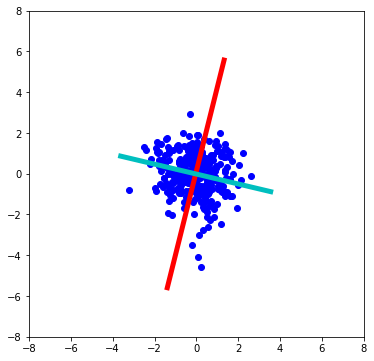

In [196]:
plt.figure(figsize=(6,6))
plot_pca(X1, V, m1, L)
plt.xlim([-8, 8])
plt.ylim([-8, 8])
L

In [192]:
U, L, V, m2 = pca(X2)

5.74535650254
3.68804717257


array([ 33.00912134,  13.60169195])

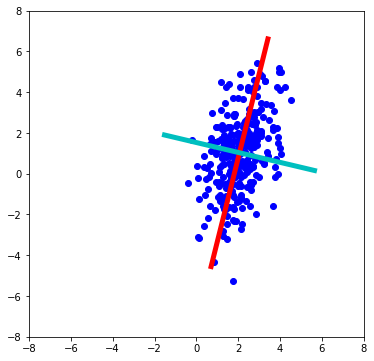

In [195]:
plt.figure(figsize=(6,6))
plot_pca(X2, V, m2, L)
plt.xlim([-8, 8])
plt.ylim([-8, 8])
L

In [168]:
V

array([[ 0.3613842,  0.932417 ],
       [ 0.932417 , -0.3613842]])

(-10, 10)

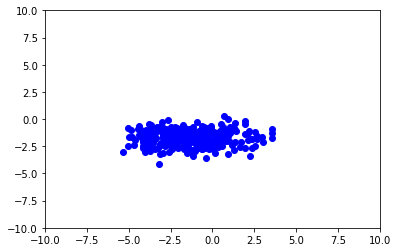

In [213]:
newX2 = (X2) @ V

plt.plot(newX2[:, 0], newX2[:, 1], 'ob')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

# Review Standardization (Input Transformation)


(-10, 10)

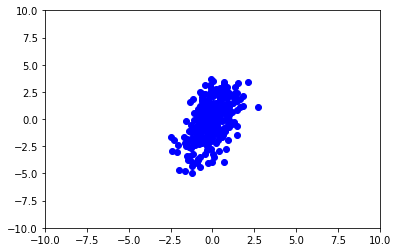

In [200]:
newX2 = (X2 - m2)

plt.plot(newX2[:, 0], newX2[:, 1], 'ob')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

(-10, 10)

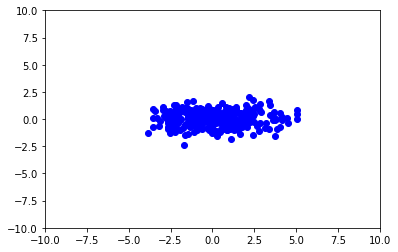

In [205]:
newX2 = (X2 - m2) @ V

plt.plot(newX2[:, 0], newX2[:, 1], 'ob')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

(-10, 10)

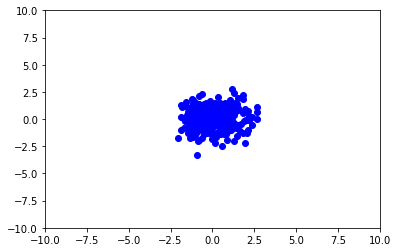

In [212]:
newX2 = (X2 - m2) @ V 
newX2 /= np.std(newX2, 0)

plt.plot(newX2[:, 0], newX2[:, 1], 'ob')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

### Input Transformation 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156/images/class/input_transform.png" width=600/>
<center>(Lecun, 1998)</center>